# Aula 5 - Obtenção de dados na Web


Essa aula é baseada em exemplos retirados das documentações das bibliotecas ``urllib``, ``re`` e ``beautiful soup``.

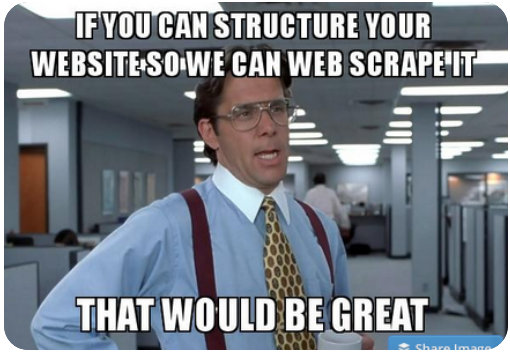

Fonte da figura: algum lugar da *Web* que não lembro mais.

# Preliminares

## Fontes de dados na Web

1. Dados já coletados e disponibilizados
 * https://archive.ics.uci.edu/ml/datasets.php
 * https://zenodo.org/
 * https://www.kaggle.com/datasets
 * https://snap.stanford.edu/data/
 * ...
2. Coleta manual
3. *Web scraping* + *Web crawling*
4. Uso de APIs

## Considerações éticas e legais

Não é porque você **sabe** fazer que você **deve** fazer

Aspectos legais e éticos sempre devem ser considerados antes de iniciar uma coleta de dados na Web

O objetivo dessa aula é **apenas** apresentar técnicas e tecnologias para coleta de dados.

**Boa prática:** sempre consulte o ``robots.txt`` de um *site* antes de iniciar uma coleta,
  * exemplo: https://facebook.com/robots.txt.
  * Leia mais sobre ``robots.txt`` em https://en.wikipedia.org/wiki/Robots_exclusion_standard

## Qual biblioteca utilizar?

A estrutura das páginas da *Web* não segue um padrão. "A Web não é um mundo civilizado". Assim, vamos precisar de uma série de ferramentas (e possivelmente *gambiarras*) toda vez que iniciarmos uma coleta.

No princípio, a *Web* era HTTP + HTML...
* ``urllib`` (https://docs.python.org/3/library/urllib.html)
* ``re`` (https://docs.python.org/3/library/re.html, https://regexr.com/, https://regex101.com/)
* ``Beautiful Soup`` (https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

Depois, inventaram ``javascript``...
* ``Selenium`` (https://selenium-python.readthedocs.io/)



# Coletando um conjunto de páginas simples

Precisaremos executar os seguintes passos:
1. Fazer uma requisição HTTP para obter o contúdo (código fonte) da página de interesse;
2. Identificar a estrutura da página que contém o conteúdo de interesse
3. Usar expressões regulares e/ou ``beautiful soup`` para extrair o conteúdo
4. Torcer (rezar?) para o proprietário da página:
  * não mudar a estrutura durante sua coleta
  * não te bloquear por excesso de requisições

## Obtendo a página com ``urllib``

In [ ]:
import urllib.error
import urllib.request
import socket

In [ ]:
def get_page(url):
    try:
        req = urllib.request.Request(url, headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'})
        with urllib.request.urlopen(req, timeout = 5) as f:
            return f.read()
    except socket.timeout as e1:
        print('\tTime out')
    except urllib.error.URLError as e2:
        print('\tURL error')
    except urllib.error.HTTPError as e3:
        print('\tHTTP error')
    return None

In [ ]:
content = get_page('http://www.google.com')

In [ ]:
type(content)

bytes

In [ ]:
decoded = content.decode('utf-8')

In [ ]:
type(decoded)

str

In [ ]:
print(decoded)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="xKSXZWLqF8fsmQsP5ngEbw">(function(){var _g={kEI:'v7P4ZLjLB7zOkPIPotCP8A4',kEXPI:'0,18168,1341241,6059,206,4804,2316,383,246,5,1129120,1197790,611,380089,16115,28684,22430,1362,12314,2820,14765,4998,17075,38444,2872,2891,562,3364,214,7614,606,60690,6514,8810,781,1244,1,16916,2652,4,3832,29062,13065,13658,2980,24046,6648,7596,1,42154,2,16395,342,23024,5679,1020,31122,4568,6259,23418,1252,33064,2,2,1,6960,19672,8155,7381,2,3,15965,873,9625,10008,7,1922,9779,20640,21819,3142,17056,201

## Extraindo conteúdo de interesse do HTML

### Mundo ideal

Exemplo extraído do *Quick Start* da biblioteca ``beautiful soup``

In [ ]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(html_doc, 'html.parser')

In [ ]:
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [ ]:
soup.title

<title>The Dormouse's story</title>

In [ ]:
soup.title.name

'title'

In [ ]:
soup.title.string

"The Dormouse's story"

In [ ]:
soup.title.parent.name

'head'

In [ ]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [ ]:
soup.p['class']

['title']

In [ ]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [ ]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [ ]:
soup.find(id="link3")

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [ ]:
for link in soup.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [ ]:
for p in soup.find_all('p'):
    print(p.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


In [ ]:
print(soup.get_text())

The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



### Mundo real

Vamos considerar um exemplo do mundo real para ver como Python pode ser útil.

Página de interesse: https://cio.com.br/seguranca/7-erros-de-governanca-de-dados-para-evitar/

Suponha que queiramos extrair as seguintes informações:
* Título
* Subtítulo
* Autor
* Data/hora

O interessante dessa página é que o HTML contém todas essas informações. Logo, ``re`` e ``beautiful soup`` são suficientes para a nossa tarefa.

Primeiro, vamos obter o código fonte da página.

In [ ]:
content = get_page('https://cio.com.br/seguranca/7-erros-de-governanca-de-dados-para-evitar/')
content = content.decode('utf-8')

Vamos criar o objeto da classe ``BeautifuSoulp``

In [ ]:
soup =  BeautifulSoup(content, features="html5lib")

<!DOCTYPE html>
<html lang="pt-BR" prefix="og: https://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script>
   if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]nowprocket/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?nowprocket=1"}else{document.location.href=href.replace("#","?nowprocket=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&nowprocket=1"}else{document.location.href=href.replace("#","&nowprocket=1#")}}}}
  </script>
  <script>
   class RocketLazyLoadScripts{constructor(){this.v="1.2.3",this.triggerEvents=["keydown","mousedown","mousemove","touchmove","touchstart","touchend","wheel"],this.userEventHandler=this._triggerListener.bind(this),this.touchStartHandler=this._onTouchStart.bind(this),this.touchMoveHandler=this._onTouchMove.bind(this),this.touchEndHandler=this._onTouchEnd.bind(this),this.clickHandler
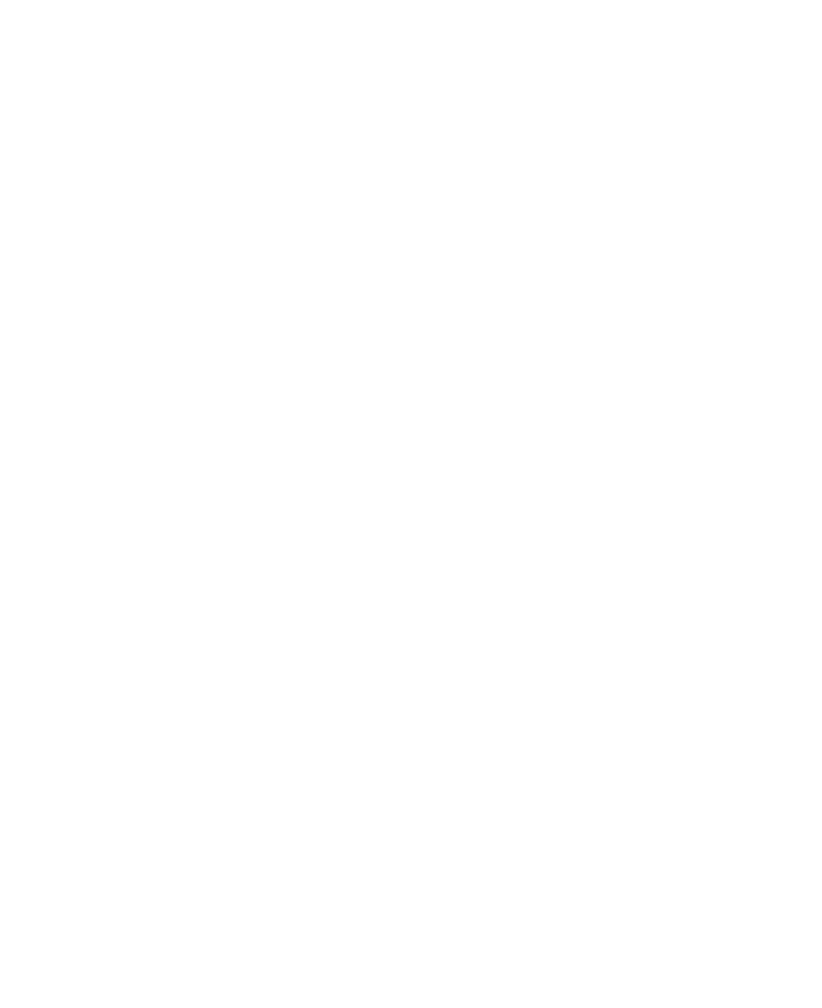

In [ ]:
print(soup.prettify())

Todos os metadados estão em uma parte bem definida e estruturada do HTML

#### *Source code* em 2021/2

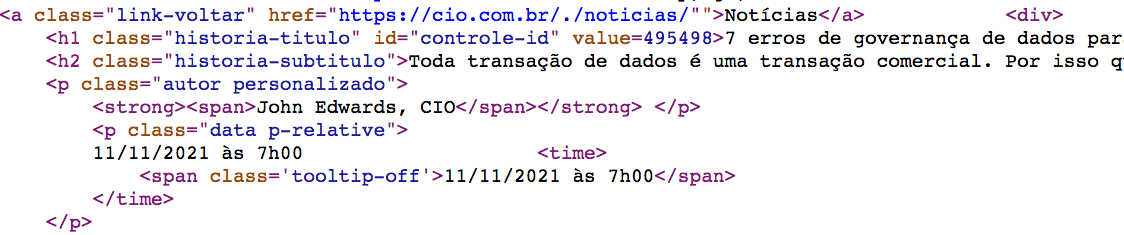

#### *Source code* em 2022/2

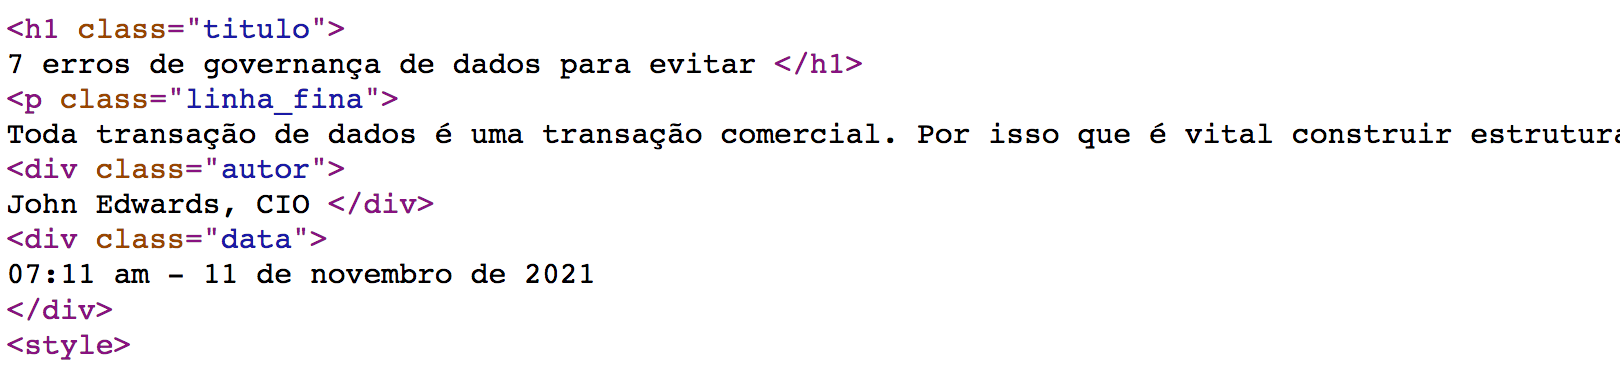

#### *Source code* em 2023/2

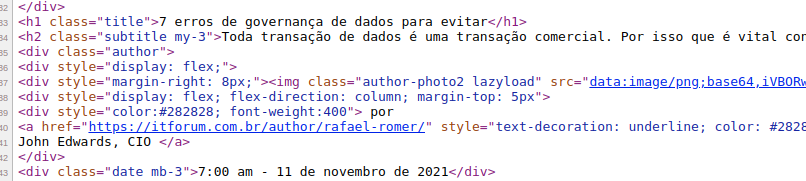

#### Título

In [ ]:
soup.find('h1', {'class': 'title'}).get_text().strip()

'7 erros de governança de dados para evitar'

#### Subtítulo

In [ ]:
soup.find('h2', {'class': 'subtitle my-3'}).get_text().strip()

'Toda transação de dados é uma transação comercial. Por isso que é vital construir estrutura de governança que seja forte, segura, adaptável'

#### Autor

In [ ]:
soup.find('div', {'class': 'author'}).get_text().strip()

'por\n\nJohn Edwards, CIO \n\n7:00 am - 11 de novembro de 2021'

In [ ]:
soup.find('div', {'class': 'author'}).get_text().strip().split(',')[0].split('\n')[-1]

'John Edwards'

#### Data/hora

In [ ]:
soup.find('div', {'class': 'date mb-3'}).get_text().strip()

'7:00 am - 11 de novembro de 2021'

#### Texto

##### Tentativa 1

In [ ]:
print(soup.get_text())

if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]nowprocket/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?nowprocket=1"}else{document.location.href=href.replace("#","?nowprocket=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&nowprocket=1"}else{document.location.href=href.replace("#","&nowprocket=1#")}}}}class RocketLazyLoadScripts{constructor(){this.v="1.2.3",this.triggerEvents=["keydown","mousedown","mousemove","touchmove","touchstart","touchend","wheel"],this.userEventHandler=this._triggerListener.bind(this),this.touchStartHandler=this._onTouchStart.bind(this),this.touchMoveHandler=this._onTouchMove.bind(this),this.touchEndHandler=this._onTouchEnd.bind(this),this.clickHandler=this._onClick.bind(this),this.interceptedClicks=[],window.addEventListener("pageshow",t=>{this.persisted=t.persisted}),window.addEventListener

##### Tentativa 2

O Texto está dentro de uma ``div`` com classe ``bloco-texto``.
Mas veja que há vários blocos de ``javascript`` dentro do texto também =(.

###### *Source code* 2021/2

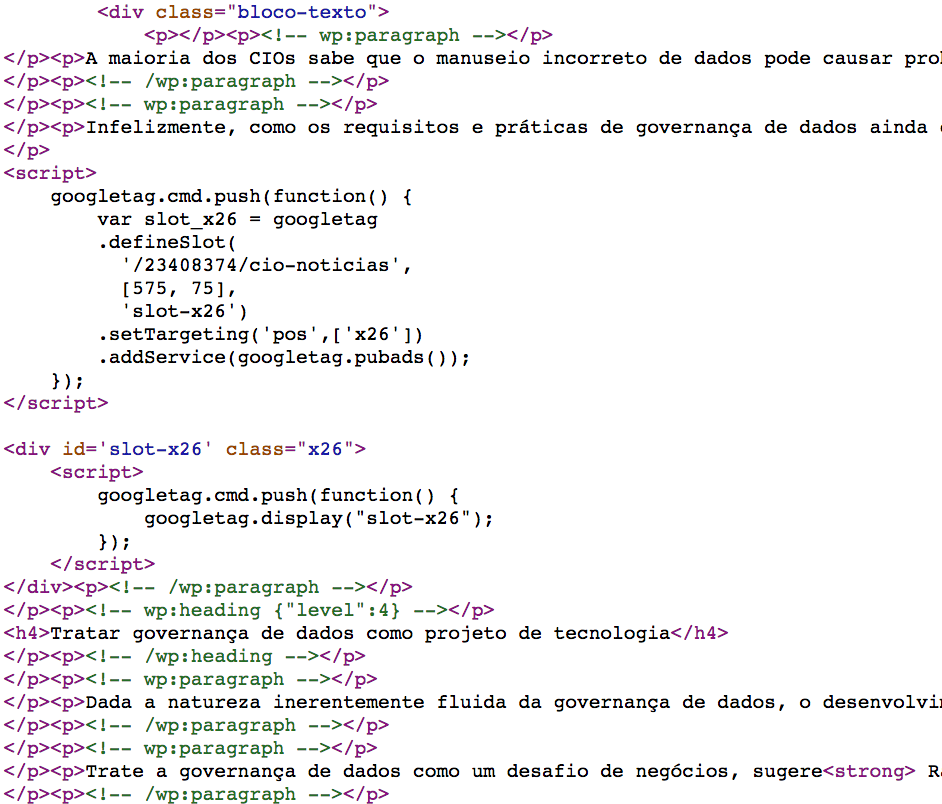

Tentativa 3 (Necessária 3m 2021/2 -- não funciona na versão atual da página)

Vamos usar expressões regulares para limpar o texto.

PS: isso também poderia ser feito com código nativo ``beautiful soup`` (e.g., método ``decompose()``). No entanto, eu quis ilustrar o uso de expressões regulares aqui também.

In [ ]:
# não execute, apenas de exemplo do código antigo
#import re

O que significa a expressão regular abaixo?

In [ ]:
# não execute, apenas de exemplo do código antigo
#my_re = re.compile('googletag\.cmd.+?\}\);', re.MULTILINE | re.DOTALL)

Substituindo todos os *matches* da expressão acima com uma *string* vazia.

In [ ]:
# não execute, apenas de exemplo do código antigo
#text_after = re.sub(my_re, '', text)

In [ ]:
# não execute, apenas de exemplo do código antigo
#print(text_after)

 
            
A maioria dos CIOs sabe que o manuseio incorreto de dados pode causar problemas de reputação, financeiros, jurídicos e dos mais diversos tipos. É por isso que ter uma política de governança de dados forte, que garanta segurança e conformidade, mas também seja acessível e gerenciável, é uma prioridade para qualquer organização que está comprometida com a integridade e preservação dos dados.


Infelizmente, como os requisitos e práticas de governança de dados ainda estão evoluindo, é fácil para os líderes de TI cair em armadilhas que, com o tempo, podem minar até mesmo os melhores esforços de planejamento pretendidos. Para evitar que sua organização caia em uma armadilha que pode tornar sua política de governança de dados ineficaz ou mesmo perigosa, fique atento aos sete erros comuns a seguir que devem ser evitados a todo custo.


    



    
		
    


Tratar governança de dados como projeto de tecnologia


Dada a natureza inerentemente fluida da governança de dados, o de

Por fim, vamos só deixar o texto mais "agradável" aos olhos.

In [ ]:
# não execute, apenas de exemplo do código antigo
#import textwrap

In [ ]:
# não execute, apenas de exemplo do código antigo
#print(textwrap.fill(textwrap.dedent(text_after).strip(), width = 80))

A maioria dos CIOs sabe que o manuseio incorreto de dados pode causar problemas
de reputação, financeiros, jurídicos e dos mais diversos tipos. É por isso que
ter uma política de governança de dados forte, que garanta segurança e
conformidade, mas também seja acessível e gerenciável, é uma prioridade para
qualquer organização que está comprometida com a integridade e preservação dos
dados.   Infelizmente, como os requisitos e práticas de governança de dados
ainda estão evoluindo, é fácil para os líderes de TI cair em armadilhas que, com
o tempo, podem minar até mesmo os melhores esforços de planejamento pretendidos.
Para evitar que sua organização caia em uma armadilha que pode tornar sua
política de governança de dados ineficaz ou mesmo perigosa, fique atento aos
sete erros comuns a seguir que devem ser evitados a todo custo.
Tratar governança de dados como projeto de tecnologia   Dada a natureza
inerentemente fluida da governança de dados, o desenvolvimento de políticas não
deve ser 

#### *Source code* 2022/2

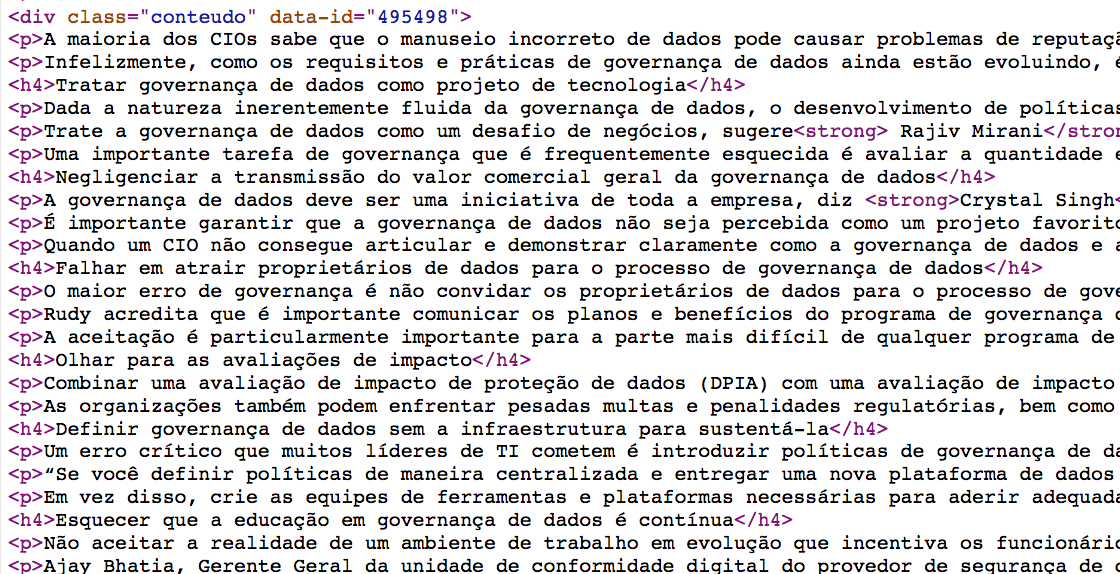

#### *Source code* em 2023/2

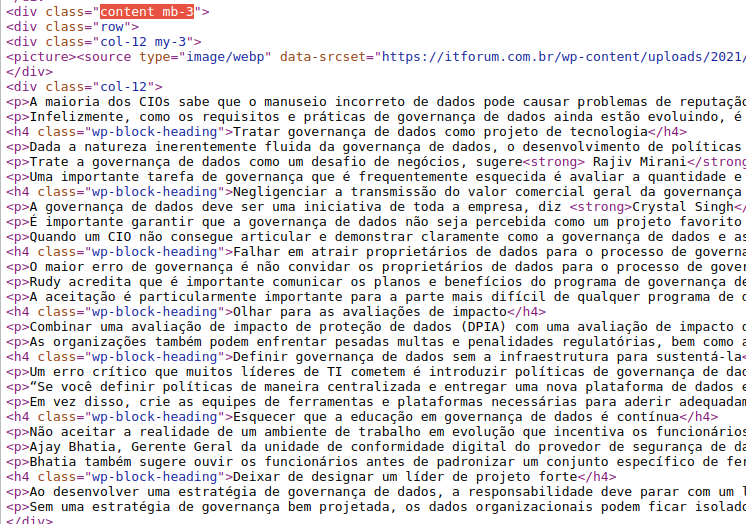

O código abaixo não funcionava nos anos passados. Aparentemente, a estrutura da página foi melhorada a cada anao.

In [ ]:
text = soup.find('div', {'class': 'content mb-3'}).get_text()

In [ ]:
print(text)







A maioria dos CIOs sabe que o manuseio incorreto de dados pode causar problemas de reputação, financeiros, jurídicos e dos mais diversos tipos. É por isso que ter uma política de governança de dados forte, que garanta segurança e conformidade, mas também seja acessível e gerenciável, é uma prioridade para qualquer organização que está comprometida com a integridade e preservação dos dados.
Infelizmente, como os requisitos e práticas de governança de dados ainda estão evoluindo, é fácil para os líderes de TI cair em armadilhas que, com o tempo, podem minar até mesmo os melhores esforços de planejamento pretendidos. Para evitar que sua organização caia em uma armadilha que pode tornar sua política de governança de dados ineficaz ou mesmo perigosa, fique atento aos sete erros comuns a seguir que devem ser evitados a todo custo.
Tratar governança de dados como projeto de tecnologia
Dada a natureza inerentemente fluida da governança de dados, o desenvolvimento de políticas não deve se

#### Colocando toda a lógica acima em uma única função

In [ ]:
# Versão 2022/2

#import textwrap
#def get_cio_page_data(url):
#  content = get_page(url)
#  content.decode('utf-8')
#  soup =  BeautifulSoup(content, features="html5lib")
#
#  title = soup.find('h1', {'class': 'titulo'}).get_text().strip()
#  subtitle = soup.find('p', {'class': 'linha_fina'}).get_text().strip()
#  author = soup.find('div', {'class': 'autor'}).get_text().strip()
#  date = soup.find('div', {'class': 'data'}).get_text().strip()
#
#  text = soup.find('div', {'class': 'conteudo'}).get_text()
#  text = textwrap.fill(textwrap.dedent(text).strip(), width = 80)

#  return {'title': title, 'subtitle': subtitle, 'author': author, 'date': date, 'text': text}

In [ ]:
# Versão 2023/2

import textwrap
def get_cio_page_data(url):
  content = get_page(url)
  content.decode('utf-8')
  soup =  BeautifulSoup(content, features="html5lib")

  title = soup.find('h1', {'class': 'title'}).get_text().strip()
  subtitle = soup.find('h2', {'class': 'subtitle my-3'}).get_text().strip()
  author = soup.find('div', {'class': 'author'}).get_text().strip().split(',')[0].strip().split('\n')[2]
  date = soup.find('div', {'class': 'date mb-3'}).get_text().strip()

  text = soup.find('div', {'class': 'content mb-3'}).get_text()
  text = textwrap.fill(textwrap.dedent(text).strip(), width = 80)

  return {'title': title, 'subtitle': subtitle, 'author': author, 'date': date, 'text': text}

In [ ]:
get_cio_page_data('https://cio.com.br/seguranca/7-erros-de-governanca-de-dados-para-evitar/')

{'title': '7 erros de governança de dados para evitar',
 'subtitle': 'Toda transação de dados é uma transação comercial. Por isso que é vital construir estrutura de governança que seja forte, segura, adaptável',
 'author': 'John Edwards',
 'date': '7:00 am - 11 de novembro de 2021',
 'text': 'A maioria dos CIOs sabe que o manuseio incorreto de dados pode causar problemas\nde reputação, financeiros, jurídicos e dos mais diversos tipos. É por isso que\nter uma política de governança de dados forte, que garanta segurança e\nconformidade, mas também seja acessível e gerenciável, é uma prioridade para\nqualquer organização que está comprometida com a integridade e preservação dos\ndados. Infelizmente, como os requisitos e práticas de governança de dados ainda\nestão evoluindo, é fácil para os líderes de TI cair em armadilhas que, com o\ntempo, podem minar até mesmo os melhores esforços de planejamento pretendidos.\nPara evitar que sua organização caia em uma armadilha que pode tornar sua\np

In [ ]:
get_cio_page_data('https://cio.com.br/noticias/tecnologia-para-os-negocios-6-tendencias-para-considerar-em-2022/')

{'title': 'Tecnologia para os negócios: 6 tendências para considerar em 2022',
 'subtitle': 'Mundo que conhecemos antes de 2020 nunca mais retornará. Mas que tecnologias vão impactar os negócios no próximo ano?',
 'author': 'Caroline Capitani* ',
 'date': '5:23 pm - 18 de novembro de 2021',
 'text': 'Estamos há quase dois anos lidando com uma pandemia e suas consequências\ndeixaram marcas profundas em empresas, consumidores e trabalhadores. O mundo que\nconhecemos antes de 2020 nunca mais retornará: novos hábitos foram criados e\nadaptações provisórias se tornaram definitivas, criando características que\nfavoreceram modelos de negócio apoiados no digital. Uma coisa é certa: quem\nestava mais preparado tecnologicamente e teve fôlego para inovar certamente\nobteve vantagem competitiva e colheu melhores resultados. Características\ndigitais, como disponibilidade, resiliência e experiência digital first, vieram\npara ficar. Listo abaixo algumas tendências que vão impactar os negócios no\n

In [ ]:
get_cio_page_data('https://cio.com.br/gestao/top-12-ferramentas-de-gerenciamento-de-servicos-de-ti/')

{'title': 'Top 12 ferramentas de gerenciamento de serviços de TI',
 'subtitle': 'Encontrar a ferramenta de GSTI certa para suas necessidades de negócios pode ser um desafio',
 'author': 'Sarah K. White',
 'date': '5:45 pm - 10 de setembro de 2018',
 'text': 'À medida que a tecnologia digital prolifera nas organizações, o\xa0gerenciamento de\nserviços de TI\xa0tornou-se uma faceta crítica para servir os negócios, e as\nferramentas destinadas a apoiar os esforços de GSTI da sua organização estão\nevoluindo para dar suporte a essas necessidades. As ferramentas GSTI ajudam as\norganizações a agilizar o atendimento ao cliente, geralmente começando com o\nhelp desk de TI.\xa0Esses conjuntos de produtos ajudam os departamentos de TI a\nmanter os sistemas de bilhetagem, criar relatórios e identificar defeitos ou\nfalhas nos produtos e serviços.\xa0À medida que o mercado de ferramentas de GSTI\ncresce, fica mais difícil identificar o melhor produto para sua organização.\nAqui apresentamos as 12

#### Minha reação toda vez que tenho que codificar algo assim

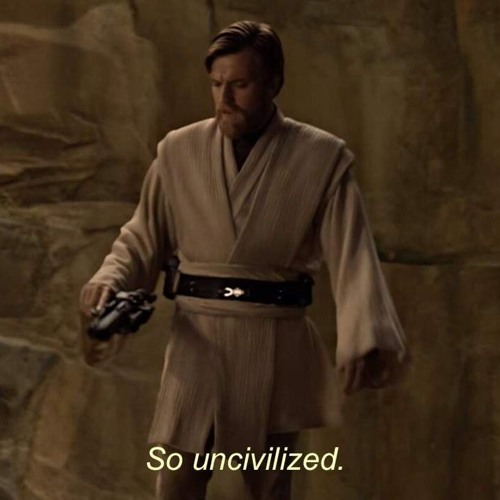

# Simulando um usuário para coletar páginas complexas

Exemplo usando ``Selenium``


# Exemplo de coleta utilizando uma API

Exemplo usando a API

*By* Voluntário **Athus**

# What is next?

É importante que entendam as dificuldades de uma coleta de dados.
Levem isso em consideração para escolherem o tema do projeto final da disciplina (especificação sai em breve)